# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

#The data describes basic SAT results for participating students from each state. Along with the rate of eligible #students that took the test, an average verbal and math score is provided for those students.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

#There's a great disparity in rates across the board, ranging anywhere from 4% of eligible students in a particular #state that took the test, all the way past 80%. This lens the potential for bias in a certain direction.

##### 3. Create a data dictionary for the dataset.

#I don't understand what the expectation is for this cell, as it's a markdown, right?

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [39]:
#pandas notes
#x.info() - wil give basic summary info of dataframe
#index==column_name==header in dataframe
#x = pd.read_csv(name csv file was assigned to) - organizes data from file into table for viewing
#x.head() - view first 5 rows of columns in table; specify rows, columns in parentheses
#x.shape() will give number of columns by number of rows in dataframe
#x.columns - will give a list of column names
#x.describe() - will give basic summary stats (min, max, count, mean, std, quartiles)
#x[column_name].describe() - will give basic summary stats for that particular column
#x.tail() - same as above, but end of table
#x[0:5] - will get a range of rows between the specified labels
#x.ix[[0]] - will give all information for the row located at identified label (in this case, 0); can use to get set of diff rows
#x['header_here'].tolist() - will turn values beneath that header into a list
#dataTypes = x.dtypes - gives data types for each column
#x.set_index('desired_key').to_dict()['value_to_key'] - will create a dictionary w/ item 1 as key and item 2 as corresponding value
#A Series is a one-dimensional object similar to an array, list, or column in a table. 
    #It will assign a labeled index to each item in the Series. 
    #By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.
    #newDict = x.set_index('State').T.to_dict('list') - the T transposes column 'State' into a series of 
                                                        #lists for each value assigned to its individual items
        #stateDict = x.Series(newDict)
        #print stateDict
#x.iloc[:,[column_index:column_index]] - this will isolate a column or column(s) placed in brackets for their own table/list

import numpy as np
import pandas as pd
import scipy.stats as stats
import csv

satScores = '../assets/01-project1-assets/sat_scores.csv'

p1 = pd.read_csv(satScores)

##### 5. Print the data

In [40]:
p1

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


##### 6. Extract a list of the labels from the data, and remove them from the data.

In [41]:
listOfLabels = []

with open(satScores, 'rU') as f:
    reader = csv.reader(f)
    
    for row in reader:
        listOfLabels.append(row)

header = listOfLabels[0]
data=listOfLabels[1:]

print header
#I'm not understanding this error message. A couple days ago, this was working fine, but now I get this.

['State', 'Rate', 'Verbal', 'Math']


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [42]:
#list of labels is now 'header'
#list of data is now 'data'
#list of states is now 'stateNames'

stateNames = p1['State'].tolist()
print stateNames

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

In [43]:
dataTypes = p1.dtypes
print dataTypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

No

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [44]:
rateByState = p1.set_index('State').to_dict()['Rate']
mathByState = p1.set_index('State').to_dict()['Math']
verbalByState = p1.set_index('State').to_dict()['Verbal']


print "Rate by State: " ,
print rateByState
print ""
print "Math by State: " ,
print mathByState
print ""
print "Verbal by State: " ,
print verbalByState

Rate by State:  {'WA': 53, 'DE': 67, 'DC': 56, 'WI': 6, 'WV': 18, 'HI': 52, 'FL': 54, 'WY': 11, 'NH': 72, 'NJ': 81, 'NM': 13, 'TX': 53, 'LA': 7, 'NC': 65, 'ND': 4, 'NE': 8, 'TN': 13, 'NY': 77, 'PA': 71, 'RI': 71, 'NV': 33, 'VA': 68, 'CO': 31, 'AK': 51, 'AL': 9, 'AR': 6, 'VT': 69, 'IL': 12, 'GA': 63, 'IN': 60, 'IA': 5, 'OK': 8, 'AZ': 34, 'CA': 51, 'ID': 17, 'CT': 82, 'ME': 69, 'MD': 65, 'All': 45, 'MA': 79, 'OH': 26, 'UT': 5, 'MO': 8, 'MN': 9, 'MI': 11, 'KS': 9, 'MT': 23, 'MS': 4, 'SC': 57, 'KY': 12, 'OR': 55, 'SD': 4}

Math by State:  {'WA': 527, 'DE': 499, 'DC': 474, 'WI': 596, 'WV': 512, 'HI': 515, 'FL': 499, 'WY': 545, 'NH': 516, 'NJ': 513, 'NM': 542, 'TX': 499, 'LA': 562, 'NC': 499, 'ND': 599, 'NE': 568, 'TN': 553, 'NY': 505, 'PA': 499, 'RI': 499, 'NV': 515, 'VA': 501, 'CO': 542, 'AK': 510, 'AL': 554, 'AR': 550, 'VT': 506, 'IL': 589, 'GA': 489, 'IN': 501, 'IA': 603, 'OK': 561, 'AZ': 525, 'CA': 517, 'ID': 542, 'CT': 510, 'ME': 500, 'MD': 510, 'All': 514, 'MA': 515, 'OH': 439, 'UT': 

##### 11. Create a dictionary with the values for each of the numeric columns

In [45]:
newDict = p1.set_index('State').T.to_dict('list')


print newDict

{'WA': [53, 527, 527], 'DE': [67, 501, 499], 'DC': [56, 482, 474], 'WI': [6, 584, 596], 'WV': [18, 527, 512], 'HI': [52, 485, 515], 'FL': [54, 498, 499], 'WY': [11, 547, 545], 'NH': [72, 520, 516], 'NJ': [81, 499, 513], 'NM': [13, 551, 542], 'TX': [53, 493, 499], 'LA': [7, 564, 562], 'NC': [65, 493, 499], 'ND': [4, 592, 599], 'NE': [8, 562, 568], 'TN': [13, 562, 553], 'NY': [77, 495, 505], 'PA': [71, 500, 499], 'RI': [71, 501, 499], 'NV': [33, 509, 515], 'VA': [68, 510, 501], 'CO': [31, 539, 542], 'AK': [51, 514, 510], 'AL': [9, 559, 554], 'AR': [6, 562, 550], 'VT': [69, 511, 506], 'IL': [12, 576, 589], 'GA': [63, 491, 489], 'IN': [60, 499, 501], 'IA': [5, 593, 603], 'OK': [8, 567, 561], 'AZ': [34, 523, 525], 'CA': [51, 498, 517], 'ID': [17, 543, 542], 'CT': [82, 509, 510], 'ME': [69, 506, 500], 'MD': [65, 508, 510], 'All': [45, 506, 514], 'MA': [79, 511, 515], 'OH': [26, 534, 439], 'UT': [5, 575, 570], 'MO': [8, 577, 577], 'MN': [9, 580, 589], 'MI': [11, 561, 572], 'KS': [9, 577, 580]

## Step 3: Describe the data

In [46]:
rateColumn = p1.iloc[:,1]
verbalColumn = p1.iloc[:,2]
mathColumn = p1.iloc[:,3]

##### 12. Print the min and max of each column

In [47]:
# Try and apply this loop to those long printouts in the project
#def eastVersusWest(compass):
#    east=compass[0] #east is the first element in 'compass'
#    eastString=[0] #same here, but you're making a string
#    eastVector=[east1] #
#    for direction in compass:
#        directionString = direction[0]
#        directionVector=direction[1]
#        print '%s.%s =' %(eastString,directionString),


print "Minimum rate is: ",
print min(rateColumn)
print "Maximum rate is: ",
print max(rateColumn)
print ' '
print "Minimum verbal score is: ",
print min(verbalColumn)
print "Maximum verbal score is: ",
print max(verbalColumn)
print ' '
print "Minimum math score is: ",
print min(mathColumn)
print 'Maximum math score is: ',
print max(mathColumn)


Minimum rate is:  4
Maximum rate is:  82
 
Minimum verbal score is:  482
Maximum verbal score is:  593
 
Minimum math score is:  439
Maximum math score is:  603


In [48]:
#revise the individual columns so they only have the values in 51 rows, to exclude the final row of 'All'
rateColumn = p1['Rate'].head(51)
verbalColumn = p1['Verbal'].head(51)
mathColumn = p1['Math'].head(51)

#27.301788 is rate's std w/ the final row, 'All', taken into account, so ours should be different


np.std(rateColumn)

27.27923867605359

##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [49]:
#This is how I performed this without the list function. Suppose I could do this with a for loop as well,
    #but they're confusing
    
#print 'The Standard Deviation of the rate is: ',
#print np.std(rateColumn)
#print ''
#print 'The Standard Deviation of the verbal column is: ',
#print np.std(verbalColumn)
#print ''
#print 'The Standard Deviation of the math column is: ',
#print np.std(mathColumn)

In [50]:
y = [np.std([data]) for data in rateColumn, verbalColumn, mathColumn]

print y

[27.279238676053591, 33.031982684152283, 35.929873173114082]


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly
#import plotly.plotly as py
#import plotly.graph_objs as go

#plotly.offline.init_notebook_mode()

%matplotlib inline

In [52]:
#rateColumn = p1['Rate'].head(51)
#verbalColumn = p1['Verbal'].head(51)
#mathColumn = p1['Math'].head(51)

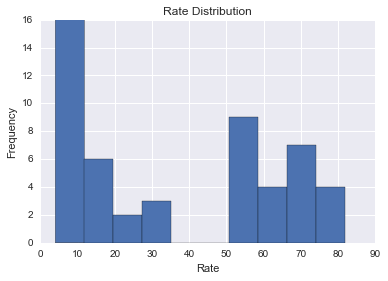

In [53]:
plt.hist(rateColumn)
plt.title("Rate Distribution")
plt.xlabel("Rate")
plt.ylabel("Frequency")

##### 15. Plot the Math distribution

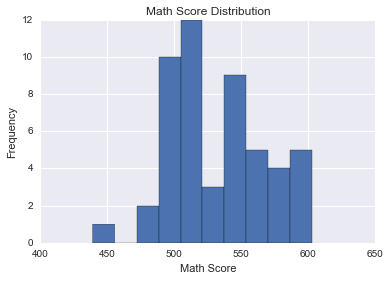

In [54]:
plt.hist(mathColumn)
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")

##### 16. Plot the Verbal distribution

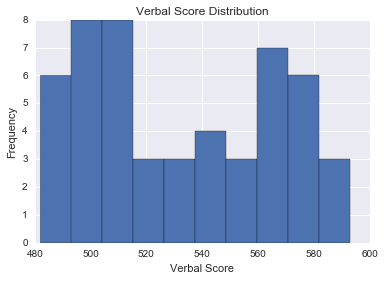

In [55]:
plt.hist(verbalColumn)
plt.title("Verbal Score Distribution")
plt.xlabel("Verbal Score")
plt.ylabel("Frequency")


##### 17. What is the typical assumption for data distribution?

In [56]:
#We can typically assume that a dataset is aligned with a normal distribution

##### 18. Does that distribution hold true for our data?

In [57]:
#The math score distribution appears to be normally distributed, although positively skewed.
#The rate and verbal scores, however, meaning there are possibly too many extreme values - particularly with the rates.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

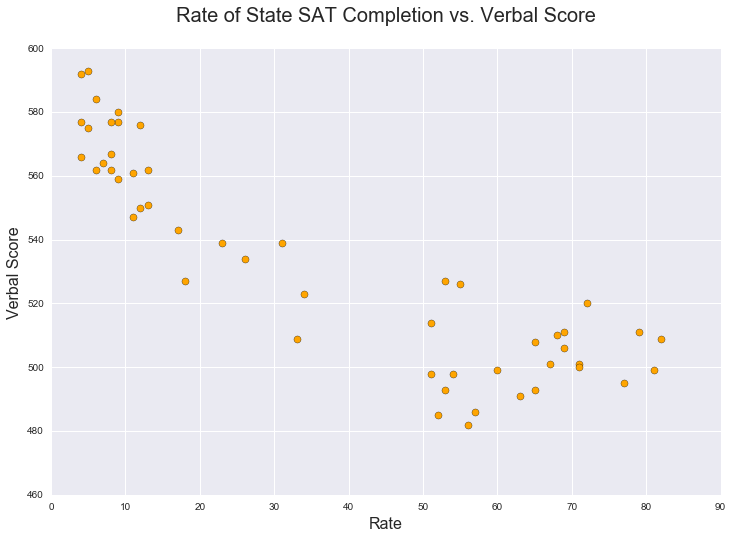

In [58]:
fig1 = plt.figure(figsize=(12,8))

axes = fig1.gca()

axes.scatter(rateColumn, verbalColumn, c='orange', s=50)

axes.set_title('Rate of State SAT Completion vs. Verbal Score\n', fontsize=20)
axes.set_xlabel('Rate', fontsize=16)
axes.set_ylabel('Verbal Score', fontsize=16)

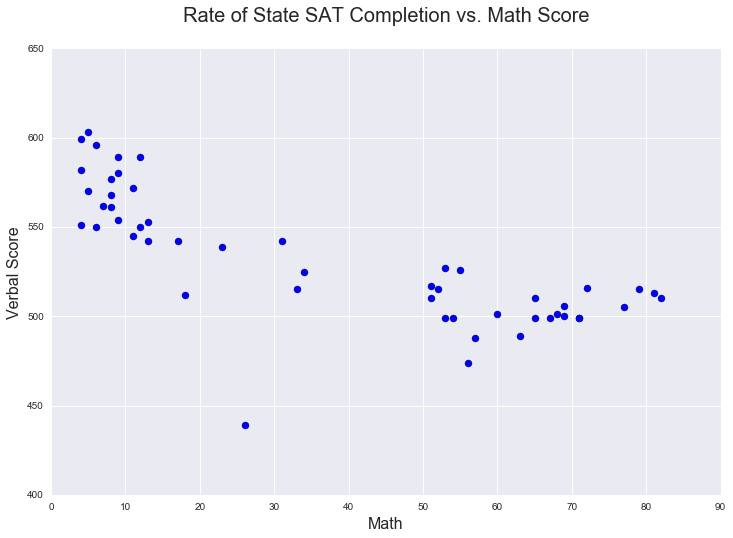

In [59]:
fig2 = plt.figure(figsize=(12,8))

axes1 = fig2.gca()

axes1.scatter(rateColumn, mathColumn, c = 'blue', s = 50)

axes1.set_title('Rate of State SAT Completion vs. Math Score\n', fontsize=20)
axes1.set_xlabel('Math', fontsize=16)
axes1.set_ylabel('Verbal Score', fontsize=16)

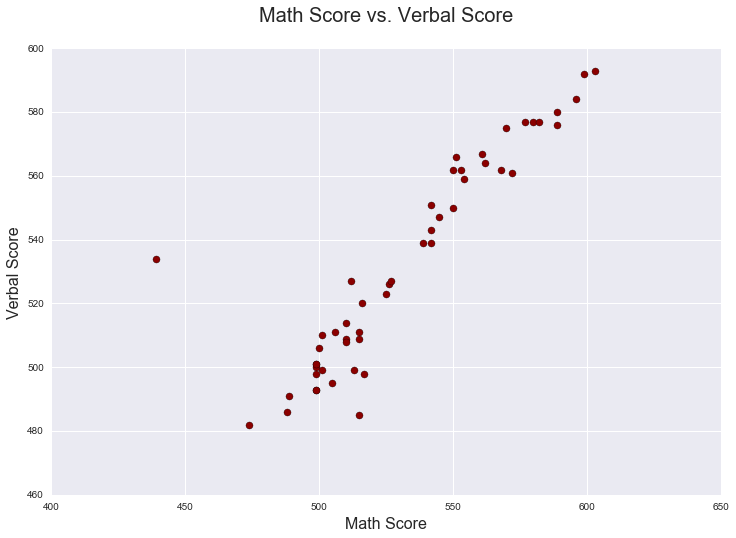

In [60]:
fig1 = plt.figure(figsize=(12,8))

axes = fig1.gca()

axes.scatter(mathColumn, verbalColumn, c = 'darkred', s = 50)

axes.set_title('Math Score vs. Verbal Score\n', fontsize=20)
axes.set_xlabel('Math Score', fontsize=16)
axes.set_ylabel('Verbal Score', fontsize=16)

##### 20. Are there any interesting relationships to note?

In [61]:
#There is a clear correlation between math and verbal scores. As one rises, so does the other.
#However, we can't assume causality one way or the other, as an unrepresented variable, like access to quality
#education, is probably the cause of both.

##### 21. Create box plots for each variable. 

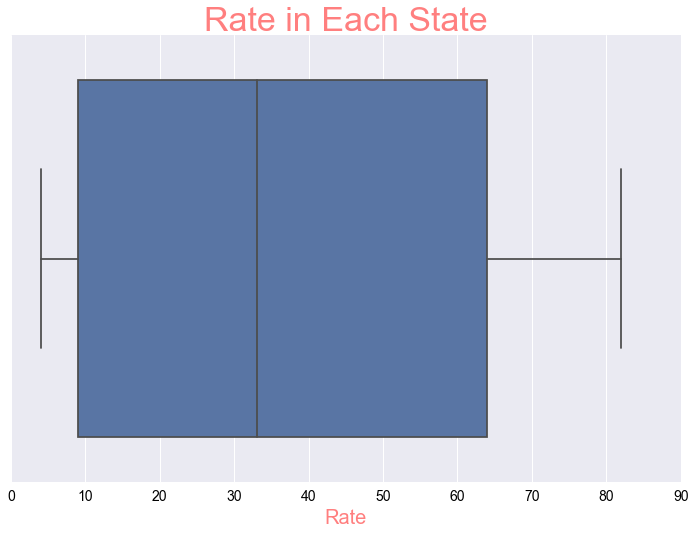

In [62]:
rBox = sns.boxplot(rateColumn)
sns.set_style('ticks')
sns.despine()

rBox.figure.set_size_inches(12,8)
rBox.axes.set_title('Rate in Each State', fontsize=34,color="r",alpha=0.5)
rBox.set_xlabel("Rate",size = 20,color="r",alpha=0.5)
rBox.tick_params(labelsize=14,labelcolor="black")

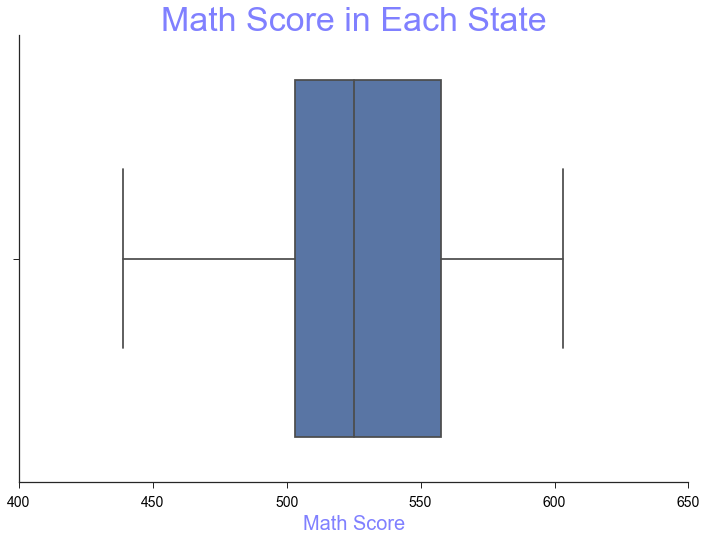

In [63]:
mBox = sns.boxplot(mathColumn)
sns.set_style('ticks')
sns.despine()

mBox.figure.set_size_inches(12,8)
mBox.axes.set_title('Math Score in Each State', fontsize=34,color="b",alpha=0.5)
mBox.set_xlabel("Math Score",size = 20,color="b",alpha=0.5)
mBox.tick_params(labelsize=14,labelcolor="black")

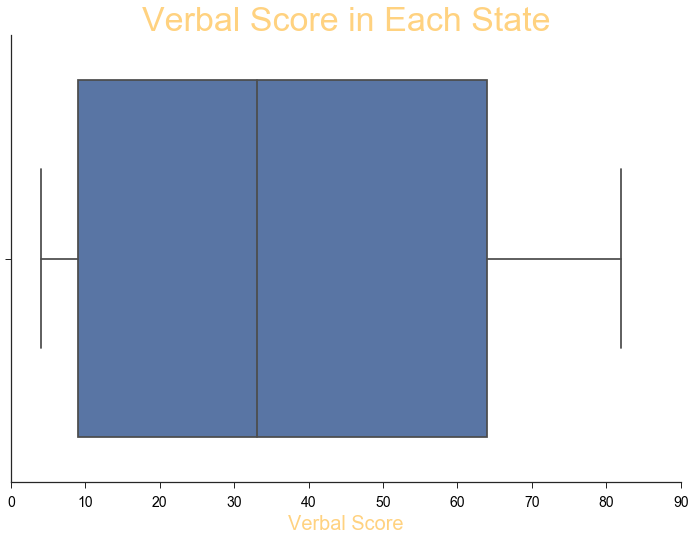

In [64]:
vBox = sns.boxplot(rateColumn)
sns.set_style('ticks')
sns.despine()

vBox.figure.set_size_inches(12,8)
vBox.axes.set_title('Verbal Score in Each State', fontsize=34,color="orange",alpha=0.5)
vBox.set_xlabel("Verbal Score",size = 20,color="orange",alpha=0.5)
vBox.tick_params(labelsize=14,labelcolor="black")

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

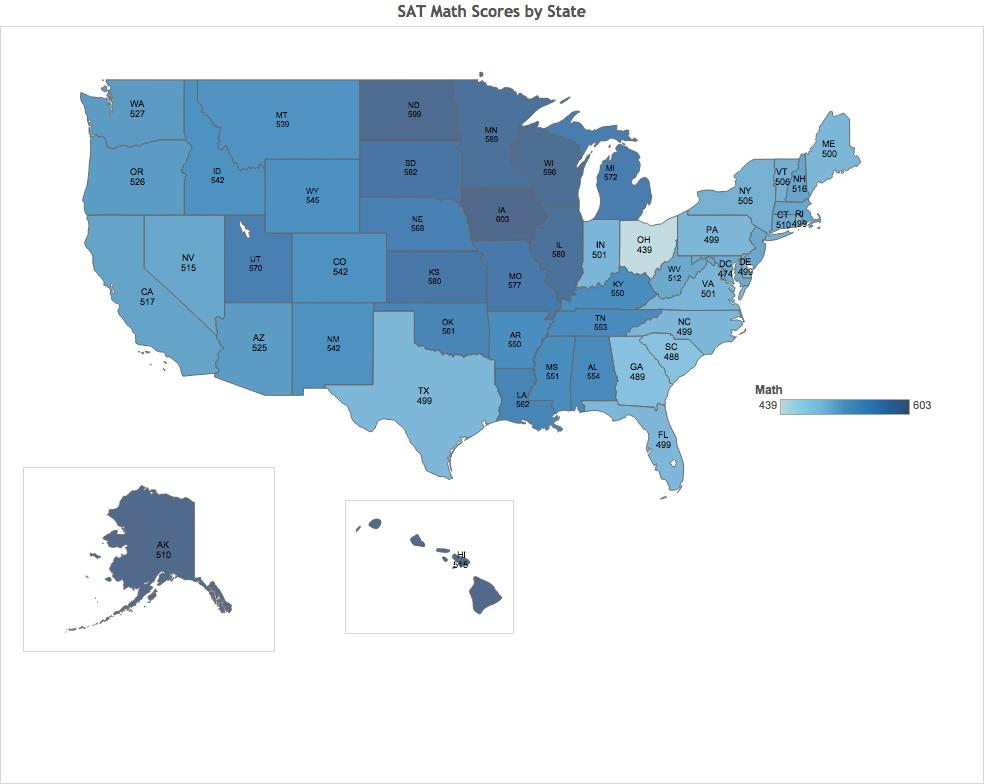

In [68]:
from IPython.display import Image
Image(filename='../assets/01-project1-assets/HeatMap_Math.jpg')

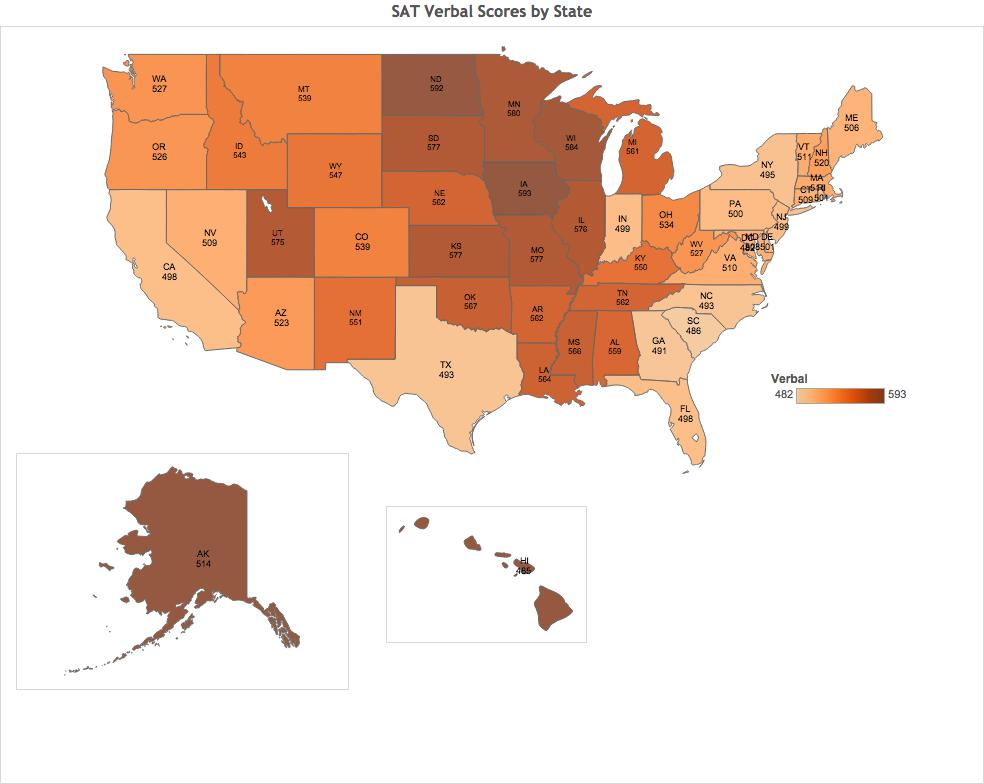

In [71]:
Image(filename='../assets/01-project1-assets/HeatMap_Verbal.jpg')

Score: 9/10
Identify: Discuss Data:3
Acquire: Load Data with Python:2
Present: Visualize Data:3
Bonus: Use Tableau:1